In [9]:
# relative paths to the movie lens data set for movies file and ratings file
movies_path = "..\\..\\Data\\ml-latest-small\\movies.csv"

# import DataFrame from pandas package so that we can work with this tabular data
import pandas as pd
from pandas import DataFrame as df

movies_df = pd.read_csv(movies_path)

# now that we have a DataFrame lets peek into the data and see how it looks
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# now lets see how many movies are there in this data
len(movies_df.index)

9742

In [11]:
# we can also get high level information of the width and height of the data frame using shape property
movies_df.shape

(9742, 3)

In [12]:
# now we can access an element at a position using loc[x_pos][y_pos] syntax 
print(movies_df.loc[0][0])
print(movies_df.loc[0][1])
print(movies_df.loc[0][2])

1
Toy Story (1995)
Adventure|Animation|Children|Comedy|Fantasy


In [13]:
# we can explicitly set the index column if our data has a unique identifier for each row using set_index
movies_df.set_index('movieId')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# now lets find out how many animation vs comedy movies exist in this dataset

movies_df['genres_arr'] = movies_df['genres'].str.split('|')
movies_df['genres_count'] =  movies_df['genres'].count()
print( movies_df['genres'])
#movies_df.drop('genres_arr1', axis=1, inplace=True)
movies_df.head()

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
5                             Action|Crime|Thriller
6                                    Comedy|Romance
7                                Adventure|Children
8                                            Action
9                         Action|Adventure|Thriller
10                             Comedy|Drama|Romance
11                                    Comedy|Horror
12                     Adventure|Animation|Children
13                                            Drama
14                         Action|Adventure|Romance
15                                      Crime|Drama
16                                    Drama|Romance
17                                           Comedy
18                                           Comedy
19          

,movieId,title,genres,genres_arr,genres_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",9742
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",9742
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",9742
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],9742


In [15]:

animation_df = movies_df[movies_df.genres_arr.map(lambda x: 'Animation' in x)]
print('# of animation movies', len(animation_df.index))

romance_df = movies_df[movies_df.genres_arr.map(lambda x: 'Comedy' in x)]
print('# of romance movies', len(romance_df.index))

# of animation movies 611
# of romance movies 3756


In [16]:
# now lets find the real masala movies which has Action and Romance and Comedy and Thriller :)
masala_lambda = lambda x: set(['Romance','Comedy', 'Action', 'Thriller']).issubset(x)
masala_movies = movies_df[movies_df.genres_arr.map(masala_lambda)]
print('# of masala movies', len(masala_movies.index))
masala_movies

# of masala movies 6


,movieId,title,genres,genres_arr,genres_count
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]",9742
1856,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]",9742
3460,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma...",9742
3608,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th...",9742
4445,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]",9742
5774,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,"[Action, Adventure, Comedy, Crime, Romance, Th...",9742


In [17]:
# now lets add another column to our dataframe which will count the number of genres for each movie
counter_lambda = lambda x: len(x)
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
movies_df.head()

,movieId,title,genres,genres_arr,genres_count,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",9742,3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",9742,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",9742,3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],9742,1


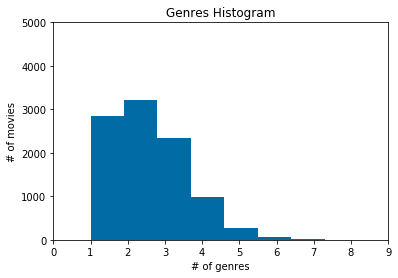

In [18]:
# now lets analyze how many genres do various movies have by plotting a histogram of genres

# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
plt.style.use("tableau-colorblind10")

plt.hist(movies_df.genre_count)
plt.title("Genres Histogram")
plt.xlabel("# of genres")
plt.ylabel("# of movies")
plt.axis([0, 9, 0, 5000])
plt.show()

In [19]:
# now lets see how many movies are there for each genre

from collections import Counter

flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]

genre_dict = dict(Counter(flattened_genres))

print(genre_dict)

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


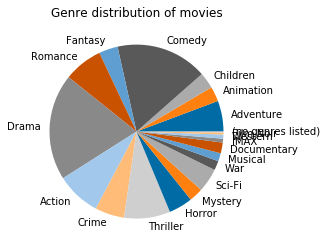

In [20]:
# now lets plot this genre distribution as a pie chart
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.title('Genre distribution of movies')
plt.show()

In [21]:
# we can also save the plot as an image to share with other
plt.savefig('./movie-genres-pie.png')

<Figure size 432x288 with 0 Axes>

[]

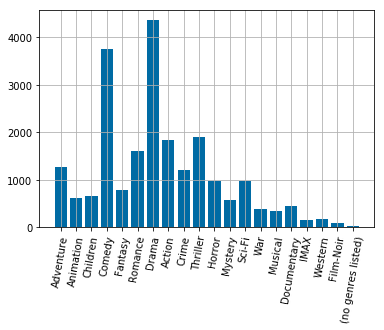

In [22]:
# we can also plot a bar chart (with grid lines and slanted x axis labels for better readability)
x = list(range(len(genre_dict)))
plt.xticks(x, genre_dict.keys(), rotation=80)
plt.bar(x, genre_dict.values())
plt.grid()
plt.plot()

In [23]:
# now lets move onto the movie ratings data
ratings_path = "..\\..\\Data\\ml-latest-small\\ratings.csv"
ratings_df = pd.read_csv(ratings_path)

# lets see how the data looks
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
# how many ratings do we have?
print('# ratings', len(ratings_df.index))

# how many different movies have been rated?
print('# movies', len(ratings_df.movieId.unique()))

# what are the different ratings given by users?
print( 'rating values', ratings_df.rating.unique())


# ratings 100836
# movies 9724
rating values [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


In [25]:
# now lets find the average movie rating across all ratings

# introducing the numpy package which is used to find various stats out of data
import numpy as np

# lets find average rating using the numpy's mean method
np.mean(ratings_df.rating)

3.501556983616962

In [26]:
# lets find the median rating
np.median(ratings_df.rating)


3.5

In [27]:
# lets find the 30th percentile rating 
np.percentile(ratings_df.rating, 30)

3.0

In [28]:
# lets find the most common rating given by users to movies (called mode of the data)
from scipy import stats
stats.mode(ratings_df.rating)

ModeResult(mode=array([4.]), count=array([26818]))

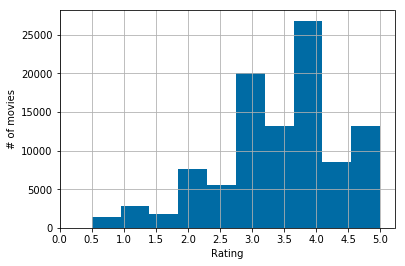

In [29]:
# now lets plot a histogram of movie ratings to get an overall picture
plt.hist(ratings_df.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [30]:
# now lets find the highest rated movies (highest average rating)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
ratings_view = ratings_df[['movieId', 'rating']]
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
4245,6201,5.0
8136,102217,5.0
8130,102084,5.0
4240,6192,5.0
9104,145994,5.0


In [32]:
# now lets merge/join the movies_df and ratings_df so that we can see the actual movie titles of top 10 movies
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genres_count,genre_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5


In [33]:
# now lets find the titles of the top 10 movies to see if we are missing on some awesome movies!
titles_df = merged_df[['movieId', 'title', 'rating']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),5.0
8089,100556,"Act of Killing, The (2012)",5.0
9065,143031,Jump In! (2007),5.0
9076,143511,Human (2015),5.0
9078,143559,L.A. Slasher (2015),5.0
4245,6201,Lady Jane (1986),5.0
8136,102217,Bill Hicks: Revelations (1993),5.0
8130,102084,Justice League: Doom (2012),5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
9104,145994,Formula of Love (1984),5.0


In [34]:
# these movies are not what we expected to be in the Top 10 movies list, something's wrong here
# lets check how many ratings have these movies received, lets take an example of movieId 163949
len(merged_df[merged_df['movieId'] == 163949].index)

0

In [35]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
temp_df = titles_df.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df['rating'] > 100].sort_values(by='rating', ascending=False)
well_rated_df.head()

,movieId,title,rating
314,356,Forrest Gump (1994),329
277,318,"Shawshank Redemption, The (1994)",317
257,296,Pulp Fiction (1994),307
510,593,"Silence of the Lambs, The (1991)",279
1938,2571,"Matrix, The (1999)",278


In [36]:
# now lets created a filtered df from merged_df which only has these movies and then find top 20 movies
filtered_df = merged_df[merged_df['movieId'].apply(lambda x: x in list(well_rated_df['movieId']))]
titles_df = filtered_df[['title', 'rating', 'movieId']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(20)

,movieId,title,rating
25,318,"Shawshank Redemption, The (1994)",4.429022
58,858,"Godfather, The (1972)",4.289062
101,2959,Fight Club (1999),4.272936
75,1221,"Godfather: Part II, The (1974)",4.259690
129,48516,"Departed, The (2006)",4.252336
73,1213,Goodfellas (1990),4.250000
130,58559,"Dark Knight, The (2008)",4.238255
8,50,"Usual Suspects, The (1995)",4.237745
67,1197,"Princess Bride, The (1987)",4.232394
20,260,Star Wars: Episode IV - A New Hope (1977),4.231076


In [37]:
# Great, so far we have seen how to extract various stats from our datasets using NumPy, Pandas 
# and visualize our data using Matplotlib, now lets do some predictive analytics..


In [38]:
# now lets add a column called rating_year which depicts the year when the rating was given
import datetime
year_lambda = lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
merged_df['rating_year'] = merged_df['timestamp'].apply(year_lambda)
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genres_count,genre_count,rating_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5,2000
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5,1996
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5,2005
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5,2017
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",9742,5,2011


In [39]:
# now lets create a new data frame which contains number of ratings given on each year
ratings_per_year = merged_df.groupby(['rating_year'])['rating_year'].count()
ratings_per_year.head()

rating_year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
Name: rating_year, dtype: int64

In [40]:
# now lets get some stats on number of ratings per year

years = ratings_per_year.keys()
num_ratings = ratings_per_year.get_values()
print('average ratings per year', np.mean(num_ratings))
print('median ratings per year', np.median(num_ratings))
print('90% ratings per year', np.percentile(num_ratings, 90))

average ratings per year 4384.173913043478
median ratings per year 4059.0
90% ratings per year 7029.2


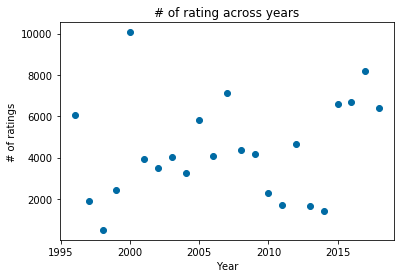

In [41]:
# now lets scatter plot this data to visualize how ratings are spead across years
plt.scatter(years, num_ratings)
plt.title('# of rating across years')
plt.xlabel('Year')
plt.ylabel('# of ratings')
plt.show()

In [42]:
# now lets try to build a linear regression model using which we will predict how many ratings we get each year
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, num_ratings)
print('Generated linear model is  y = ' + str(slope) + ' * x + ' + str(intercept))

Generated linear model is  y = 72.05138339920947 * x + -140222.95256916992


In [43]:
# now lets use the slope and intercept to create a predict function which will predict num_ratings given a year
def predict_num_ratings(year):
    return slope * year + intercept

predicted_ratings = predict_num_ratings(years)

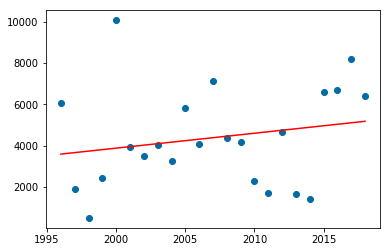

In [44]:
# now lets plot our predicted values along side the actual data to see how well we did
plt.scatter(years, num_ratings)
plt.plot(years, predicted_ratings, c='r')
plt.show()

In [45]:
# now lets see how good our prediction is by calculating the r-squared value
r_square = r_value ** 2
print('Linear Model r_square value', r_square)

Linear Model r_square value 0.04081602216251049


In [46]:
# thats a poor model r_square ranges from 0 to 1, the close to 1 the better the model accuracy

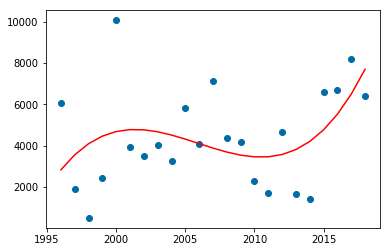

In [47]:
# now lets try a polynomial function instead of a linear function and see if that fits better
polynomial = np.poly1d(np.polyfit(years, num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [48]:
# now lets calculate the r-square for this polynomial regression

from sklearn.metrics import r2_score
r2 = r2_score(num_ratings, polynomial(years))
print('Polynomial Model r_square value', r2)

Polynomial Model r_square value 0.19195759593598605


In [49]:
# now we can predict how many ratings we expect in any year using our polynomial function
print(polynomial(2017))          
print(polynomial(2018))     

6486.352588653564
7690.327045440674


In [50]:
# awesome, now lets implement another important ML technique 'Classification'
